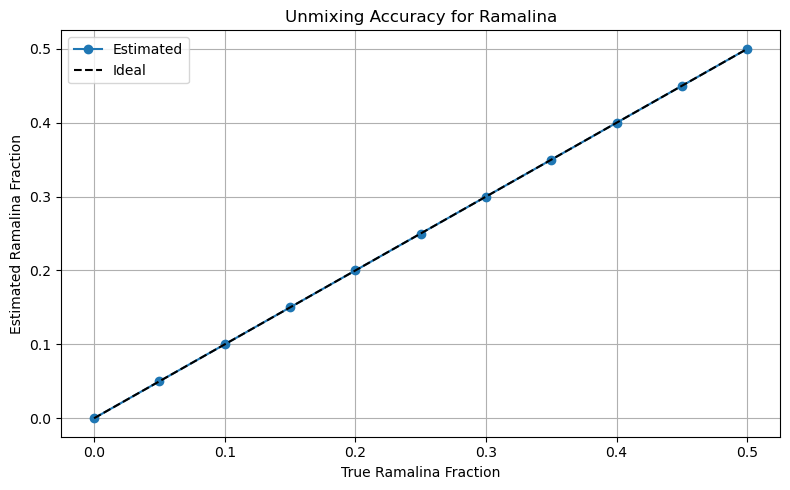

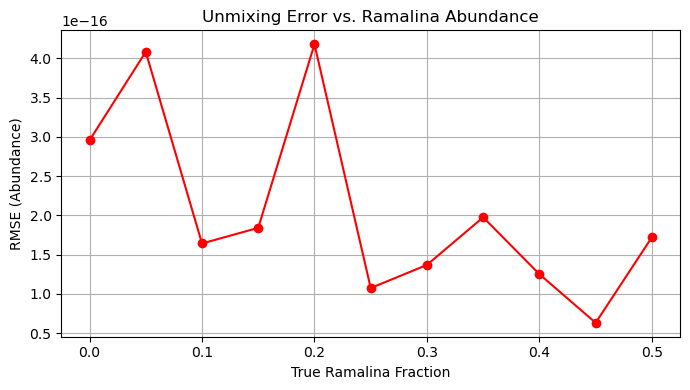

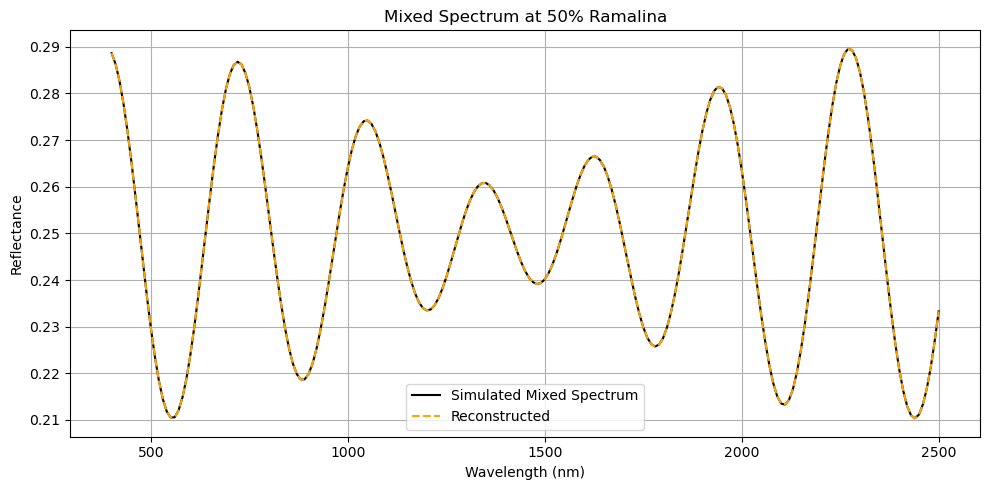

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load or define synthetic endmembers ---
# You can replace this with your actual endmember CSV
wavelengths = np.arange(400, 2501, 10)  # 400–2500 nm at 10 nm intervals
n_bands = len(wavelengths)

# Simulated endmembers: [Ramalina, Soil, Vegetation]
ramalina = 0.3 + 0.05 * np.sin(wavelengths / 50)
soil = 0.2 + 0.03 * np.cos(wavelengths / 60)
veg = 0.5 + 0.1 * np.exp(-((wavelengths - 700) ** 2) / (2 * 100**2))

E = np.vstack([ramalina, soil, veg]).T  # shape: (n_bands, 3)

# --- Simulate mixtures and apply unmixing ---
fractions = np.linspace(0, 0.5, 11)  # Ramalina from 0% to 50%
errors = []
estimated_all = []

for frac in fractions:
    true_abund = np.array([frac, 0.5, 0.5 - frac])  # Ramalina, Soil, Veg
    mixed = E @ true_abund
    
    # Linear unmixing via least squares
    estimated_abund, _, _, _ = np.linalg.lstsq(E, mixed, rcond=None)
    estimated_all.append(estimated_abund)
    
    # Error = RMSE between true and estimated
    rmse = np.sqrt(np.mean((true_abund - estimated_abund) ** 2))
    errors.append(rmse)

# --- Plot estimated vs. true Ramalina fraction ---
estimated_ramalina = [est[0] for est in estimated_all]

plt.figure(figsize=(8, 5))
plt.plot(fractions, estimated_ramalina, 'o-', label='Estimated')
plt.plot(fractions, fractions, 'k--', label='Ideal')
plt.xlabel("True Ramalina Fraction")
plt.ylabel("Estimated Ramalina Fraction")
plt.title("Unmixing Accuracy for Ramalina")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot error trend ---
plt.figure(figsize=(7, 4))
plt.plot(fractions, errors, 'r-o')
plt.xlabel("True Ramalina Fraction")
plt.ylabel("RMSE (Abundance)")
plt.title("Unmixing Error vs. Ramalina Abundance")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Optional: Visualize a mixed spectrum ---
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, mixed, label="Simulated Mixed Spectrum", color="black")
plt.plot(wavelengths, E @ estimated_abund, '--', label="Reconstructed", color="orange")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title(f"Mixed Spectrum at {frac*100:.0f}% Ramalina")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import os
os.makedirs("images", exist_ok=True)

fig = plt.gcf()  # Get the current active figure (last one shown)
fig.savefig("images/robbie.png")
plt.close(fig)



